In [1]:
import xml.etree.ElementTree as ET
import os,glob, json, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

In [2]:
img_sample = cv2.imread("/kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (121).jpg")

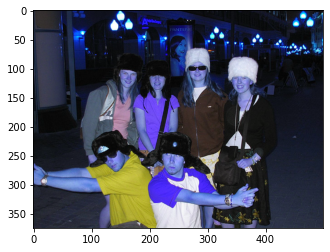

In [3]:
plt.imshow(img_sample)

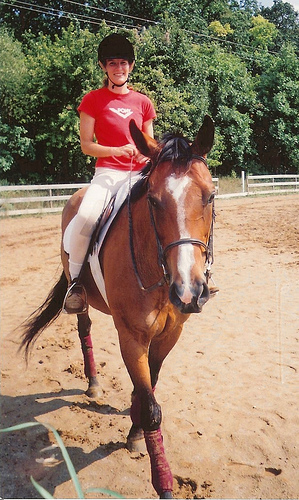

In [4]:
Image.open("/kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (125).jpg")

In [5]:
# cone the repo with yolo
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15368, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15368 (delta 2), reused 6 (delta 1), pack-reused 15355
Receiving objects: 100% (15368/15368), 14.36 MiB | 18.07 MiB/s, done.
Resolving deltas: 100% (10502/10502), done.


In [6]:
os.listdir("./yolov5")

['README.zh-CN.md',
 'README.md',
 'models',
 'classify',
 '.gitattributes',
 'hubconf.py',
 '.pre-commit-config.yaml',
 '.github',
 'LICENSE',
 'requirements.txt',
 'CITATION.cff',
 'setup.cfg',
 'CONTRIBUTING.md',
 'detect.py',
 'benchmarks.py',
 'segment',
 'train.py',
 'data',
 'tutorial.ipynb',
 '.gitignore',
 'utils',
 'val.py',
 'export.py',
 '.git',
 '.dockerignore']

In [7]:
os.chdir("/kaggle/working/yolov5")

In [8]:
os.listdir("./")

['README.zh-CN.md',
 'README.md',
 'models',
 'classify',
 '.gitattributes',
 'hubconf.py',
 '.pre-commit-config.yaml',
 '.github',
 'LICENSE',
 'requirements.txt',
 'CITATION.cff',
 'setup.cfg',
 'CONTRIBUTING.md',
 'detect.py',
 'benchmarks.py',
 'segment',
 'train.py',
 'data',
 'tutorial.ipynb',
 '.gitignore',
 'utils',
 'val.py',
 'export.py',
 '.git',
 '.dockerignore']

In [9]:
!pwd

/kaggle/working/yolov5


In [10]:
!pip install -r requirements.txt -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
gcsfs 2022.5.0 requires fsspec==2022.5.0, but you have fsspec 2023.1.0 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.


In [11]:
import torch
import utils
display = utils.notebook_init() 

YOLOv5 🚀 v7.0-134-g23c4923 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4554.9/8062.4 GB disk)


In [12]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source "/kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (121).jpg"

detect: weights=['yolov5s.pt'], source=/kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (121).jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)

100%|██████████████████████████████████████| 14.1M/14.1M [00:00<00:00, 33.2MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (121).jpg: 480x640 8 persons, 1 clock, 29.9ms
Speed: 0.7ms pre-process, 29.9ms inference, 33.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [13]:
os.listdir("runs/detect/exp")

['image (121).jpg']

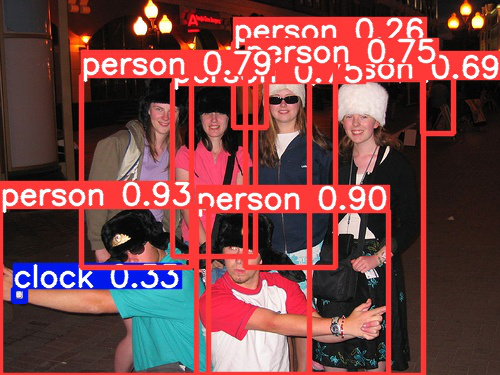

In [14]:
Image.open("runs/detect/exp/image (121).jpg")

In [15]:
# load the model
# /kaggle/working/yolov5/yolov5s.pt

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirements "gitpython>=3.1.30" "setuptools>=65.5.1" not found, attempting AutoUpdate...

requirements: 2 packages updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-134-g23c4923 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [16]:
tester = model("/kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (152).jpg")

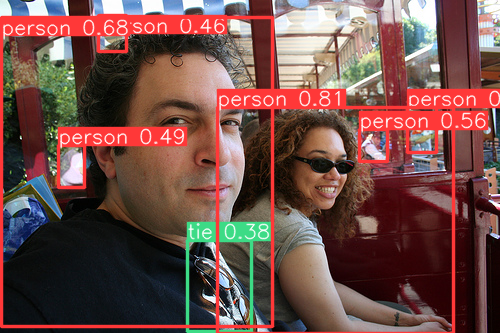

In [17]:
# plot
tester.show() 

In [18]:
# function to run inference from the model
def detect_samples(network, data):
    pred=network(data)
    # get the class Names from Ids
    class_names  = np.array([pred.names[x] for x in pred.pred[0].detach().cpu()[:, -1].numpy()])
    bounding_boxes, scores , class_ids = (
        pred.pred[0].detach().cpu()[:, :4].numpy(), 
        pred.pred[0].detach().cpu()[:, 4].numpy(), 
        pred.pred[0].detach().cpu()[:, -1].numpy().astype(int)
    )
    
    return class_ids, class_names, scores, bounding_boxes

In [19]:
class_ids, class_names, scores, bounding_boxes  = detect_samples(model, "/kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (152).jpg")

In [20]:
dict(zip(class_ids, class_names))

{0: 'person', 27: 'tie'}

In [21]:
res = {n:0 for n in class_names}

In [22]:
for i, name in enumerate(class_names):
    res[name] +=1
    print(scores[i])

0.81170523
0.6755016
0.55767465
0.48566455
0.46194017
0.39991933
0.377474


In [23]:
res

{'person': 6, 'tie': 1}

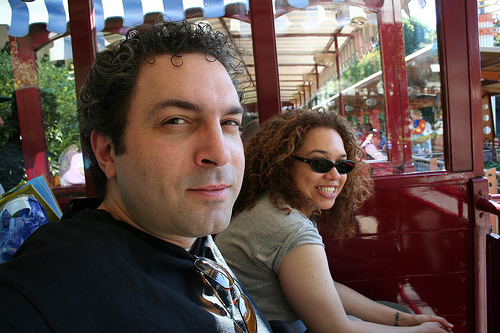

In [24]:
Image.open("/kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (152).jpg")

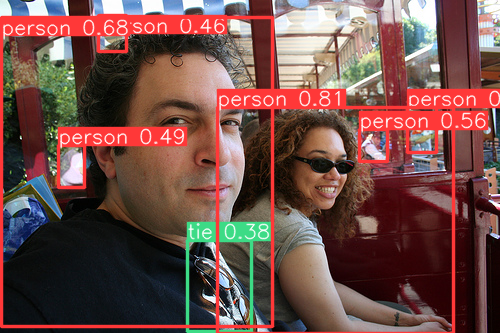

In [25]:
model(Image.open("/kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (152).jpg")).show()

In [26]:
def get_number_of_objects(model, img_path, threshold=0.25):
    class_ids, class_names, scores, bounding_boxes  = detect_samples(model, img_path )
    #print(class_ids)
    #print(class_names)
    #print(scores)
    object_name_dict = dict(zip(class_ids, class_names))
    # a dictionary to hold the class name with the number of counts init as 0 by defauolt
    resultant_object = {n:0 for n in class_names}
    #get counts as at certain threshold
    for i, cname in enumerate(class_names):
        ith_score = scores[i]
        if ith_score > threshold:
            resultant_object[cname] +=1           
    return resultant_object

In [27]:
curr_img_path = "/kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (152).jpg"
threshold = 0.25
curr_res  = get_number_of_objects(model, curr_img_path,threshold)

print(f"Image :  {curr_img_path} has the following object coutns as a THRESHOLD OF {threshold}:  ")
for k,v in curr_res.items():
    if v >0:
        print(f"\tNumber of  {k} as  {v} counts:")
print()

Image :  /kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (152).jpg has the following object coutns as a THRESHOLD OF 0.25:  
	Number of  person as  6 counts:
	Number of  tie as  1 counts:



In [28]:
TESTER_IGS_DIRS = glob.glob("/kaggle/input/pedestrian-detection/Train/Train/JPEGImages/*jpg")

In [29]:
len(TESTER_IGS_DIRS)

944

In [30]:
# Take a sample of 100 imgs and count the objects present
for curr_sample_img in np.random.choice(TESTER_IGS_DIRS, 100, replace=False):
    threshold = 0.25
    curr_res  = get_number_of_objects(model, curr_sample_img,threshold)
    print(f"Image :  {curr_sample_img} has the following object coutns as a THRESHOLD OF {threshold}:  ")
    for k,v in curr_res.items():
        if v >0:
            print(f"\tNumber of  {k} as  {v} counts:")
    print()

Image :  /kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (360).jpg has the following object coutns as a THRESHOLD OF 0.25:  
	Number of  person as  1 counts:
	Number of  remote as  1 counts:

Image :  /kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (492).jpg has the following object coutns as a THRESHOLD OF 0.25:  
	Number of  couch as  1 counts:
	Number of  person as  1 counts:
	Number of  wine glass as  3 counts:

Image :  /kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (370).jpg has the following object coutns as a THRESHOLD OF 0.25:  
	Number of  person as  4 counts:
	Number of  train as  1 counts:

Image :  /kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (927).jpg has the following object coutns as a THRESHOLD OF 0.25:  
	Number of  handbag as  1 counts:
	Number of  person as  1 counts:

Image :  /kaggle/input/pedestrian-detection/Train/Train/JPEGImages/image (307).jpg has the following object coutns as a THRESHOLD OF